In [81]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Data Preparation:

In [29]:
df=pd.read_excel(r"C:\Users\disha\OneDrive\heart_disease.xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# EDA:

# checking for missing values

In [30]:
print(df.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [34]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [36]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [37]:
summary_stats = df.describe()
print(summary_stats)


              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.055826    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# box plot

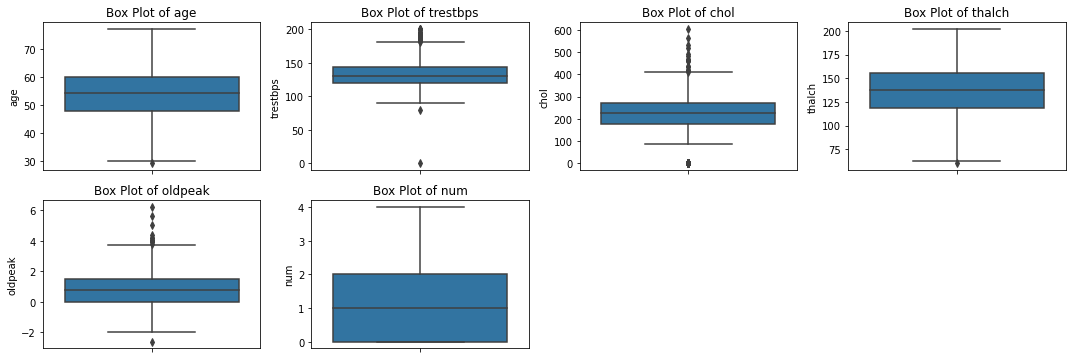

In [39]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

1.Box Plot of Age (age):
Median age is around 55 years.
The interquartile range (IQR) spans from approximately 45 to 62 years.
There are no significant outliers.

2.Box Plot of Resting Blood Pressure (trestbps):
Median resting blood pressure is around 130 mm Hg.
IQR ranges from about 120 to 140 mm Hg.
There are outliers below 100 mm Hg and around 200 mm Hg.

3.Box Plot of Serum Cholesterol (chol):
Median cholesterol level is about 240 mg/dL.
IQR spans from roughly 210 to 280 mg/dL.
There are numerous outliers above 400 mg/dL and some below 150 mg/dL.

4.Box Plot of Maximum Heart Rate Achieved (thalach):
Median maximum heart rate is around 150 bpm.
IQR ranges from approximately 130 to 170 bpm.
There are some outliers below 80 bpm.

5.Box Plot of ST Depression Induced by Exercise Relative to Rest (oldpeak):
Median ST depression is about 1.0.
IQR spans from roughly 0.5 to 2.0.
There are outliers below 0 and above 4.0.

6.Box Plot of Target Variable (num):
Median of the target variable is around 1.0.
IQR ranges from 0 to 2.0.
There are no significant outliers.

In [40]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f'Unique values in {feature}: {df[feature].unique()}')


Unique values in sex: ['Male' 'Female']
Unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang: [False True 'FALSE' 'TURE']
Unique values in slope: ['downsloping' 'flat' 'upsloping']
Unique values in thal: ['fixed defect' 'normal' 'reversable defect']


# histogram

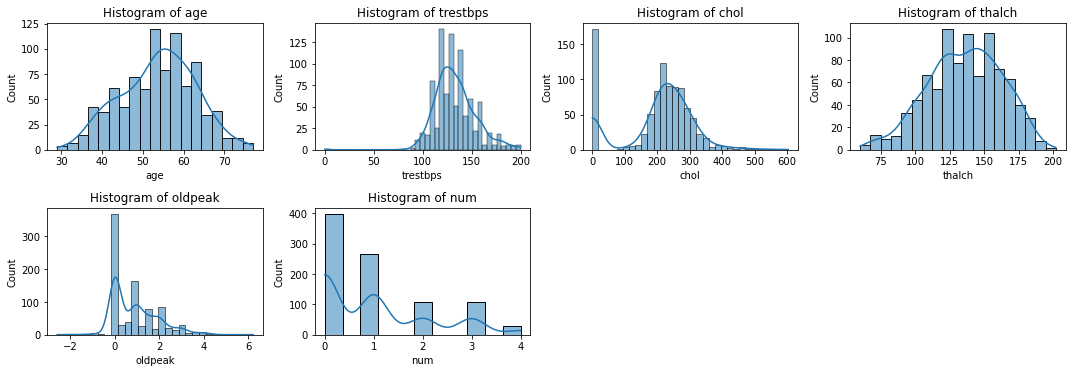

In [41]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


# correlation matrix

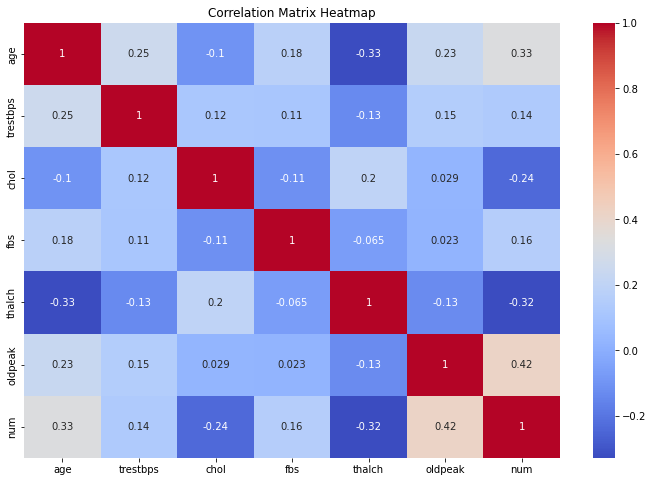

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Feature Engineering:

In [43]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_features)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded.head()

Categorical features: Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,41,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,57,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,52,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,57,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [44]:
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numerical features:", numeric_features)
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])
df_encoded.head()

Numerical features: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,True,0.524183,1.334996,-0.881977,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.397560,0.076967,0.013526,False,-0.147705,-0.844594,-0.881977,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0.350503,0.322181,-0.084656,False,0.449529,-0.465535,-0.881977,1,0,0,0,1,0,0,0,0,1,0,0,0
3,-0.195767,-0.756760,-0.138211,False,2.017268,-0.844594,-0.881977,1,0,0,1,0,0,0,0,0,1,0,0,0
4,0.350503,-1.149102,-0.004325,False,-0.371668,0.576878,-0.881977,1,0,0,0,1,0,1,0,0,1,0,0,0


# Decision Tree Classification:

In [49]:
X = df_encoded.drop(columns='num')
y = df_encoded['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (726, 19)
X_test shape: (182, 19)
y_train shape: (726,)
y_test shape: (182,)


In [51]:
print(y.unique())


[-0.8819769  -0.00770286  0.86657119  1.74084524  2.61511929]


In [52]:
y = y.astype(int)


In [53]:
print(y.unique())

[0 1 2]


In [60]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

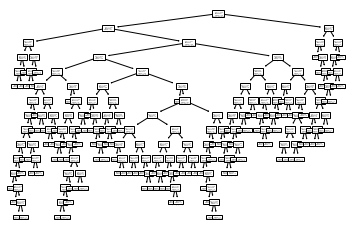

In [76]:
tree.plot_tree(clf);

In [61]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [100]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo', average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.7747
Precision: 0.7945
Recall: 0.7747
F1-score: 0.7840
ROC-AUC: 0.5536

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       159
           1       0.12      0.18      0.15        17
           2       0.00      0.00      0.00         6

    accuracy                           0.77       182
   macro avg       0.34      0.35      0.34       182
weighted avg       0.79      0.77      0.78       182



In this, we split the dataset into training and testing sets using an 80-20 split, trained a Decision Tree Classifier on the training set, and evaluated its performance on the testing set using various metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.

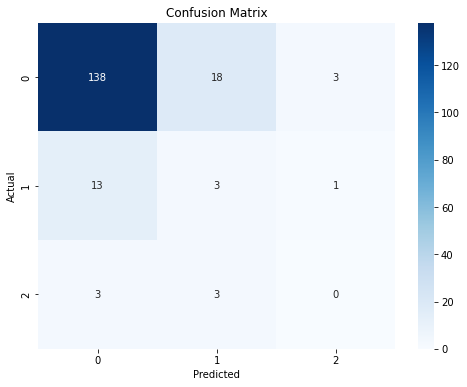

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

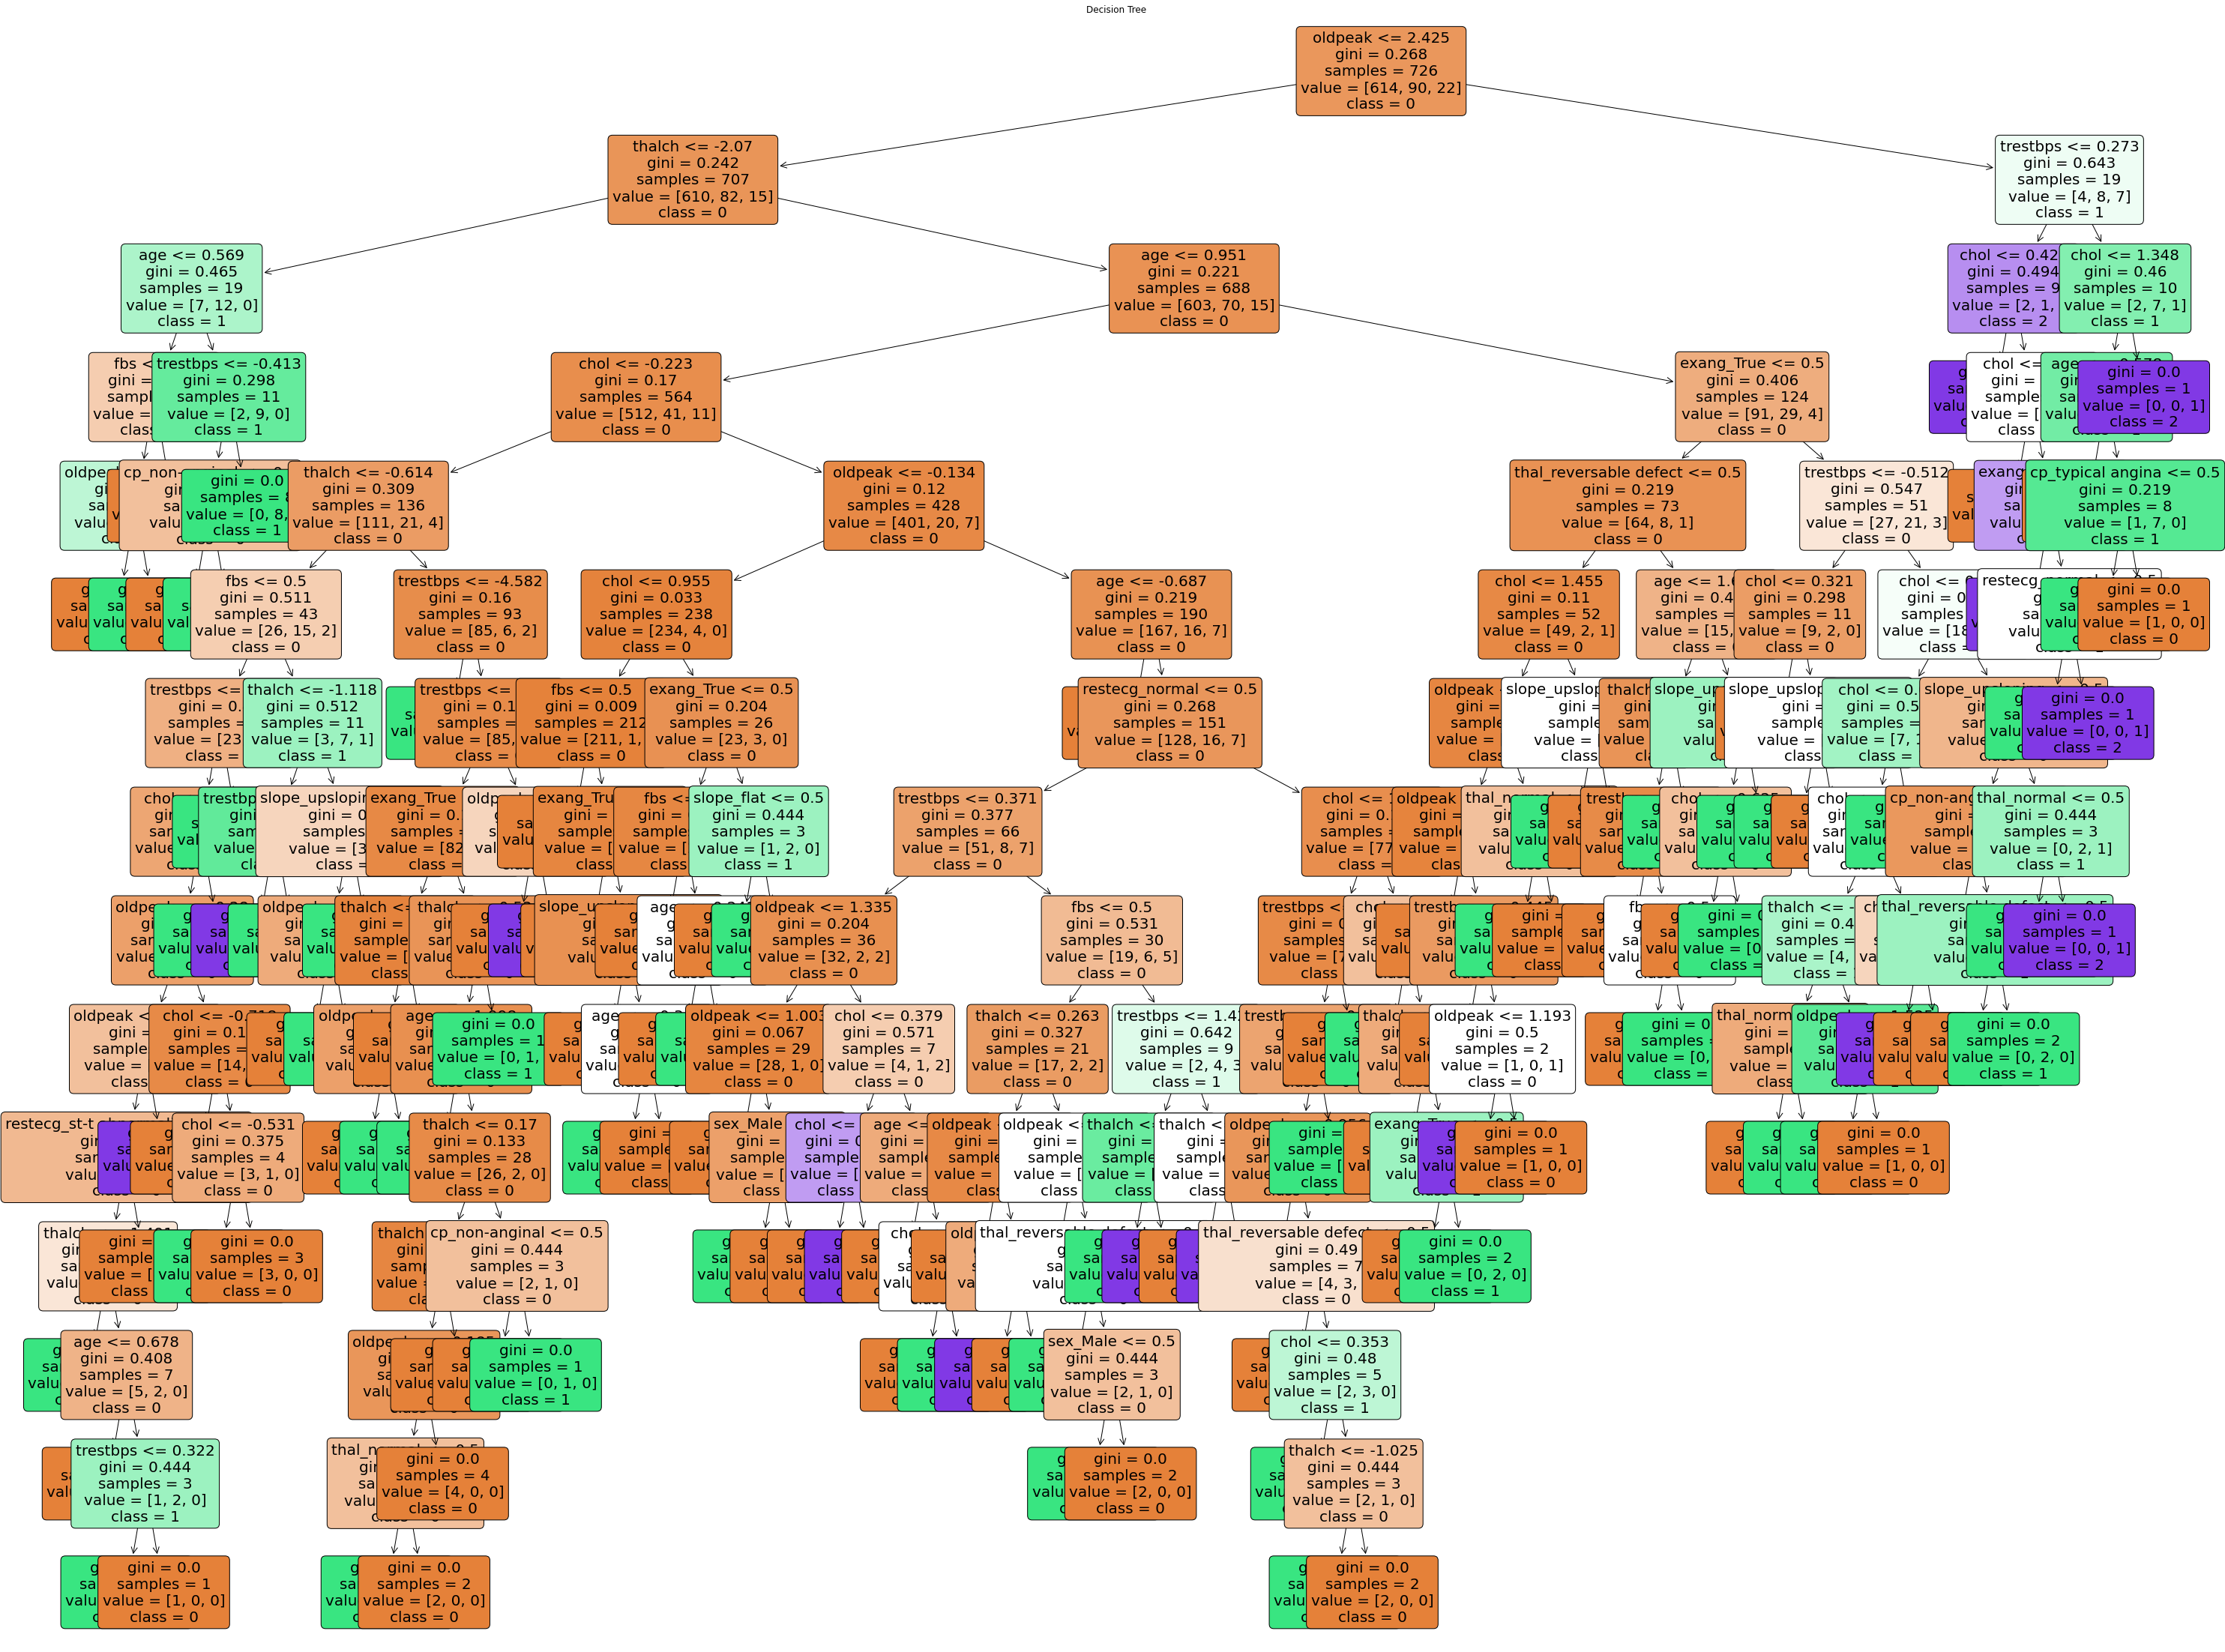

In [94]:
plt.figure(figsize=(50,40))
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns, 
          class_names=class_names, 
          rounded=True, 
          fontsize=20)
plt.title('Decision Tree')
plt.show()


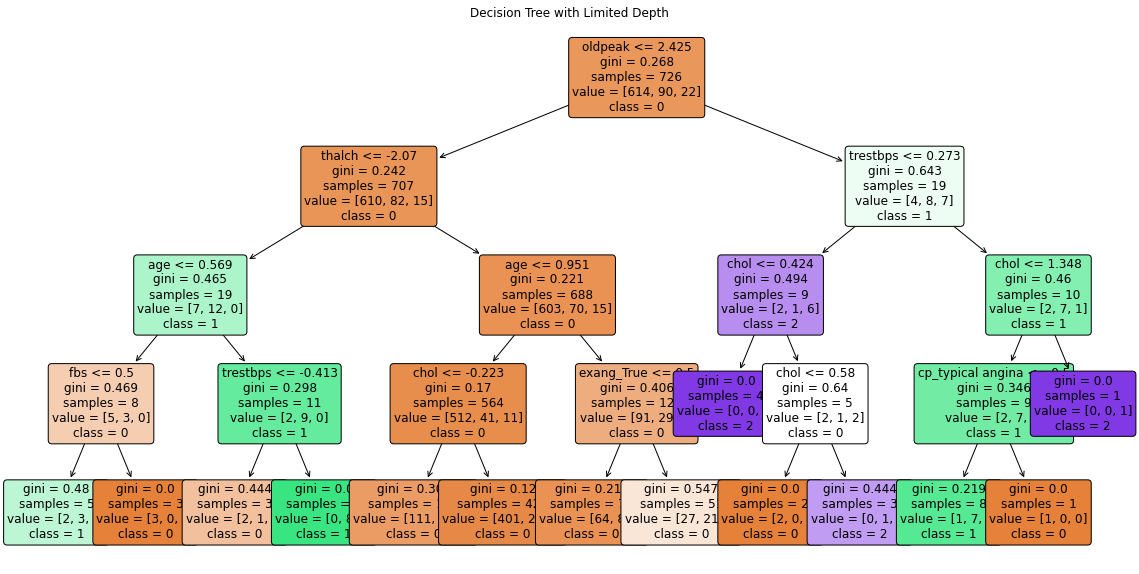

In [95]:
clf_limited_depth = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_limited_depth.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_limited_depth, 
          filled=True, 
          feature_names=X.columns, 
          class_names=class_names, 
          rounded=True, 
          fontsize=12)
plt.title('Decision Tree with Limited Depth')
plt.show()


# Hyperparameter Tuning:

In [110]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=2)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [108]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Test Accuracy: 0.8461538461538461


The grid search identified that the best model uses the 'entropy' criterion, a maximum depth of 10, and a minimum samples split of 10. This combination achieved the highest average accuracy across the cross-validation folds.